In [15]:
import numpy as np
import matplotlib.pyplot as plt

N = 31
dx = 1.0
d = 4.0
x0 = 4.0
max_iter = 500
w = 1.9 

In [16]:
x = np.arange(-N, N+1, dx)
y = np.arange(-N, N+1, dx)
X, Y = np.meshgrid(x, y, indexing='ij')
rho = np.exp(-((X - x0)**2 + Y**2) / d**2) - np.exp(-((X + x0)**2 + Y**2) / d**2)

In [17]:
def compute_S(u, rho):
    lap_x = (u[2:, 1:-1] + u[:-2, 1:-1] - 2*u[1:-1, 1:-1]) / dx**2
    lap_y = (u[1:-1, 2:] + u[1:-1, :-2] - 2*u[1:-1, 1:-1]) / dx**2
    u_c   = u[1:-1, 1:-1]
    rho_c = rho[1:-1, 1:-1]
    S_local = -0.5 * u_c * (lap_x + lap_y) - rho_c * u_c
    return np.sum(S_local) * dx**2

In [18]:
u2 = np.zeros_like(X)
S2_vals = []
for it in range(1, max_iter+1):
    for i in range(1, 2*N):
        for j in range(1, 2*N):
            u_new = (u2[i+1,j] + u2[i-1,j] + u2[i,j+1] + u2[i,j-1] + rho[i,j]*dx**2) / 4.0
            u2[i,j] = (1 - w)*u2[i,j] + w*u_new
    S2_vals.append(compute_S(u2, rho))

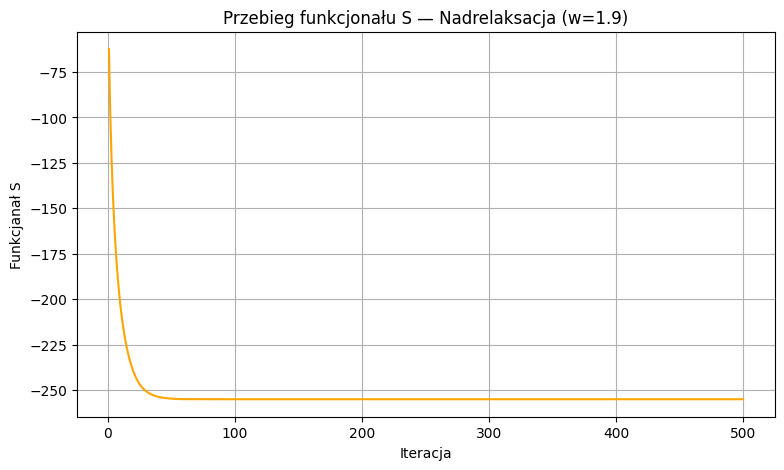

In [25]:
plt.figure(figsize=(9,5))
plt.plot(np.arange(1, max_iter+1), S2_vals, 'orange')
plt.xlabel('Iteracja')
plt.ylabel('Funkcjanał S')
plt.title(f'Przebieg funkcjonału S — Nadrelaksacja (w={w})')
plt.grid(True)
plt.show()